## Simulações Práticas com Python

Vamos simular os conceitos-chave do capítulo para visualizar o impacto dos parâmetros do sistema no seu desempenho.

1.  **Análise de Sistemas de 2ª Ordem:** Investigaremos como a variação do coeficiente de amortecimento ($\zeta$) e da frequência natural ($\omega_n$) altera a resposta ao degrau de um sistema.
2.  **Efeito de um Zero Adicional:** Analisaremos como a adição de um zero à função de transferência de um sistema de 2ª ordem modifica sua resposta transitória, validando a discussão da Seção 5.4.

In [1]:
# Importando as bibliotecas necessárias
!pip install control
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Configurações para os gráficos
plt.style.use('seaborn-v0_8-whitegrid')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 5.3 MB/s eta 0:00:00


--- Simulação 1: Influência de ζ e ωn no Desempenho ---


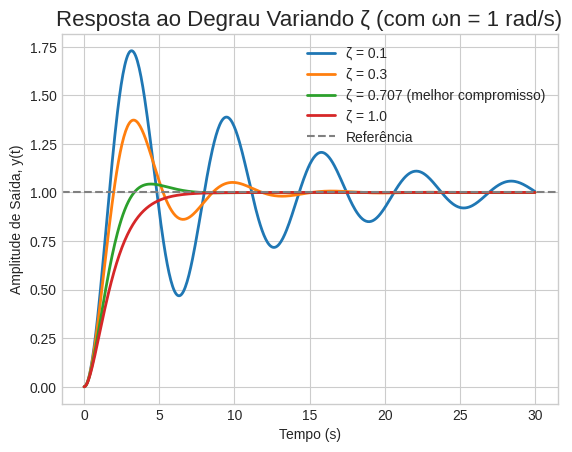

ANÁLISE (Variando ζ):
- ζ baixo (< 0.7): Resposta rápida, mas com overshoot e oscilações significativas.
- ζ alto (> 1.0): Resposta lenta (superamortecida), sem overshoot.
- ζ ≈ 0.7: Bom compromisso entre velocidade e baixa oscilação.


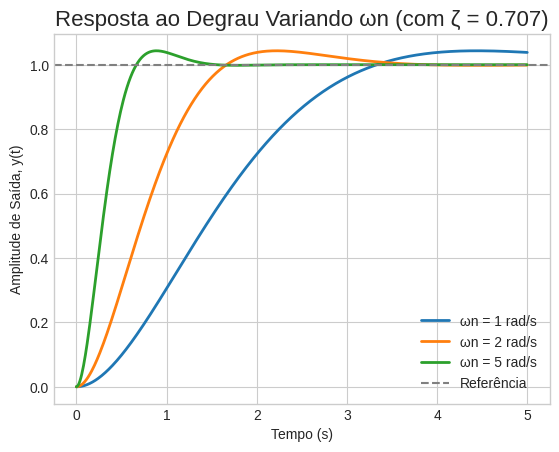

ANÁLISE (Variando ωn):
- O overshoot percentual NÃO muda, pois ele depende apenas de ζ.
- Aumentar ωn torna a resposta do sistema significativamente mais rápida (menor tempo de subida, pico e acomodação).

--- Verificação: Teoria vs. Simulação (para ζ=0.3 e ωn=1) ---
Overshoot Teórico: 37.23% | Simulado: 37.07%
Tempo de Pico Teórico: 3.29s | Simulado: 3.26s
Tempo de Acomodação (2%) Teórico: 13.33s
(O tempo de acomodação simulado pode ser verificado visualmente no gráfico)


In [2]:
print("--- Simulação 1: Influência de ζ e ωn no Desempenho ---")

# --- PARTE A: Variando o Coeficiente de Amortecimento (ζ) ---
omega_n = 1  # Frequência natural mantida constante em 1 rad/s
zeta_vals = [0.1, 0.3, 0.707, 1.0] # Valores subamortecido, criticamente amortecido e superamortecido

plt.figure()
for zeta in zeta_vals:
    # Monta a FT canônica de 2ª ordem
    num = [omega_n**2]
    den = [1, 2*zeta*omega_n, omega_n**2]
    sys = ct.tf(num, den)

    # Calcula a resposta ao degrau
    t, y = ct.step_response(sys, T=np.linspace(0, 30, 500))

    # Plota o resultado
    label_str = f'ζ = {zeta}'
    if zeta == 0.707:
        label_str += ' (melhor compromisso)'
    plt.plot(t, y, label=label_str, linewidth=2)

plt.title(f'Resposta ao Degrau Variando ζ (com ωn = {omega_n} rad/s)', fontsize=16)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude de Saída, y(t)')
plt.axhline(1, color='gray', linestyle='--', label='Referência')
plt.legend()
plt.grid(True)
plt.show()

print("ANÁLISE (Variando ζ):")
print("- ζ baixo (< 0.7): Resposta rápida, mas com overshoot e oscilações significativas.")
print("- ζ alto (> 1.0): Resposta lenta (superamortecida), sem overshoot.")
print("- ζ ≈ 0.7: Bom compromisso entre velocidade e baixa oscilação.")


# --- PARTE B: Variando a Frequência Natural (ωn) ---
zeta = 0.707 # Coeficiente de amortecimento mantido constante
omega_n_vals = [1, 2, 5]

plt.figure()
for omega_n in omega_n_vals:
    # Monta a FT canônica de 2ª ordem
    num = [omega_n**2]
    den = [1, 2*zeta*omega_n, omega_n**2]
    sys = ct.tf(num, den)

    # Calcula a resposta ao degrau
    t, y = ct.step_response(sys, T=np.linspace(0, 5, 500))

    # Plota o resultado
    plt.plot(t, y, label=f'ωn = {omega_n} rad/s', linewidth=2)

plt.title(f'Resposta ao Degrau Variando ωn (com ζ = {zeta})', fontsize=16)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude de Saída, y(t)')
plt.axhline(1, color='gray', linestyle='--', label='Referência')
plt.legend()
plt.grid(True)
plt.show()

print("ANÁLISE (Variando ωn):")
print("- O overshoot percentual NÃO muda, pois ele depende apenas de ζ.")
print("- Aumentar ωn torna a resposta do sistema significativamente mais rápida (menor tempo de subida, pico e acomodação).")

# --- Cálculo Teórico vs. Simulado ---
print("\n--- Verificação: Teoria vs. Simulação (para ζ=0.3 e ωn=1) ---")
zeta_test = 0.3
omega_n_test = 1.0

# Valores Teóricos
MUP_teorico = 100 * np.exp(-zeta_test * np.pi / np.sqrt(1 - zeta_test**2))
Ts_teorico = 4 / (zeta_test * omega_n_test)
Tp_teorico = np.pi / (omega_n_test * np.sqrt(1 - zeta_test**2))

# Valores Simulados
sys_test = ct.tf([omega_n_test**2], [1, 2*zeta_test*omega_n_test, omega_n_test**2])
t_test, y_test = ct.step_response(sys_test)
MUP_simulado = (y_test.max() / y_test[-1] - 1) * 100
Tp_simulado = t_test[y_test.argmax()]

print(f"Overshoot Teórico: {MUP_teorico:.2f}% | Simulado: {MUP_simulado:.2f}%")
print(f"Tempo de Pico Teórico: {Tp_teorico:.2f}s | Simulado: {Tp_simulado:.2f}s")
print(f"Tempo de Acomodação (2%) Teórico: {Ts_teorico:.2f}s")
print("(O tempo de acomodação simulado pode ser verificado visualmente no gráfico)")


--- Simulação 2: Influência de um Zero na Resposta Transitória ---


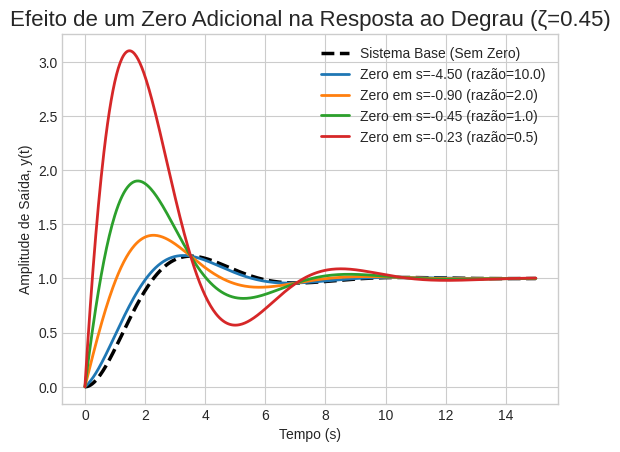

ANÁLISE (Efeito do Zero):
- Quanto mais próximo o zero está da origem (menor 'a'), mais agressiva é a resposta.
- Um zero próximo aos polos dominantes aumenta significativamente o overshoot e diminui o tempo de subida.
- Quando o zero está muito distante (razão > 5 ou 10), seu efeito se torna desprezível e a resposta se aproxima do sistema de 2ª ordem original.


In [4]:
print("\n--- Simulação 2: Influência de um Zero na Resposta Transitória ---")

# Parâmetros do sistema base de 2ª ordem
zeta = 0.45
omega_n = 1.0

# Sistema base (sem zero)
num_base = [omega_n**2]
den_base = [1, 2*zeta*omega_n, omega_n**2]
sys_base = ct.tf(num_base, den_base)

# Posições do zero a serem testadas (-a)
# a razão a/(ζ*ωn) controla o quão dominante é o efeito do zero
# Valores de 'a' correspondentes às razões [10, 2, 1, 0.5] do livro (Fig. 5.13)
a_vals = [10*zeta*omega_n, 2*zeta*omega_n, 1*zeta*omega_n, 0.5*zeta*omega_n]

plt.figure()

# Plot da resposta base
t_base, y_base = ct.step_response(sys_base, T=np.linspace(0, 15, 500))
plt.plot(t_base, y_base, label='Sistema Base (Sem Zero)', linestyle='--', color='k', linewidth=2.5)

# Loop para testar cada posição do zero
for a in a_vals:
    # Função de Transferência com o zero: T(s) = (ωn²/a) * (s+a) / (s²+2ζωns+ωn²)
    # A normalização (ωn²/a) garante que o ganho estático seja 1, para uma comparação justa
    num_com_zero = [(omega_n**2)/a, omega_n**2]
    den_com_zero = [1, 2*zeta*omega_n, omega_n**2]
    sys_com_zero = ct.tf(num_com_zero, den_com_zero)

    # Calcula e plota a resposta ao degrau
    t, y = ct.step_response(sys_com_zero, T=np.linspace(0, 15, 500))
    razao = a / (zeta * omega_n)
    plt.plot(t, y, label=f'Zero em s=-{a:.2f} (razão={razao:.1f})', linewidth=2)

plt.title('Efeito de um Zero Adicional na Resposta ao Degrau (ζ=0.45)', fontsize=16)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude de Saída, y(t)')
plt.legend()
plt.grid(True)
plt.show()

print("ANÁLISE (Efeito do Zero):")
print("- Quanto mais próximo o zero está da origem (menor 'a'), mais agressiva é a resposta.")
print("- Um zero próximo aos polos dominantes aumenta significativamente o overshoot e diminui o tempo de subida.")
print("- Quando o zero está muito distante (razão > 5 ou 10), seu efeito se torna desprezível e a resposta se aproxima do sistema de 2ª ordem original.")